{1: 0.9771528998242531}
Feature ranking:
1. feature 23 - mean radius (0.174293)
2. feature 28 - mean texture (0.166363)
3. feature 8 - mean perimeter (0.158564)
4. feature 7 - mean area (0.155893)
5. feature 14 - mean smoothness (0.120291)
6. feature 21 - mean compactness (0.037564)
7. feature 3 - mean concavity (0.034024)
8. feature 2 - mean concave points (0.022261)
9. feature 27 - mean symmetry (0.016702)
10. feature 25 - mean fractal dimension (0.016638)
11. feature 13 - radius error (0.011122)
12. feature 4 - texture error (0.010325)
13. feature 22 - perimeter error (0.009570)
14. feature 20 - area error (0.009068)
15. feature 29 - smoothness error (0.008479)
16. feature 5 - compactness error (0.007694)
17. feature 17 - concavity error (0.006456)
18. feature 30 - concave points error (0.006219)
19. feature 1 - symmetry error (0.006114)
20. feature 11 - fractal dimension error (0.003432)
21. feature 26 - worst radius (0.003206)
22. feature 19 - worst texture (0.003136)
23. feature 

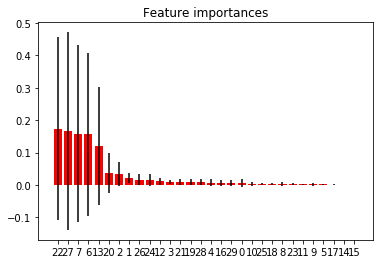

In [5]:
#Basado en: https://www.eduonix.com/dashboard/complete-guide-to-machine-learning-using-python
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import sys

model = RandomForestClassifier(n_estimators=5,random_state=0, n_jobs= 10)
cancer = datasets.load_breast_cancer()


# Train
model.fit(cancer.data, cancer.target)

# Extract single tree

bestScore={0:0}

for forest, tree in enumerate(model.estimators_):
    score = tree.score(cancer.data,cancer.target)
    if score > list(bestScore.values())[0]:
        bestScore={forest:score}

print(bestScore)
estIndex = list(bestScore.keys())[0]

treeSTD = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
totalFeatures = len(cancer.data[0])

feature_labels = cancer.feature_names

# Print the feature ranking
print("Feature ranking:")
for f in range(totalFeatures):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f]+1, feature_labels[f],importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(totalFeatures), importances[indices],
       color="r",yerr=treeSTD[indices], align="center")
plt.xticks(range(totalFeatures), indices)
plt.show()
